In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

%matplotlib inline
plt.style.use(["paper.mplstyle"])

In [2]:
def load_file(fname):
    data = dict()
    with h5py.File(fname, "r") as ff:
        for name, values in ff.items():
            if name == "xvals":
                xvals = values[()]
            else:
                data[name] = {
                    key: val[()] for key, val in values.items()
                }
    return data, xvals

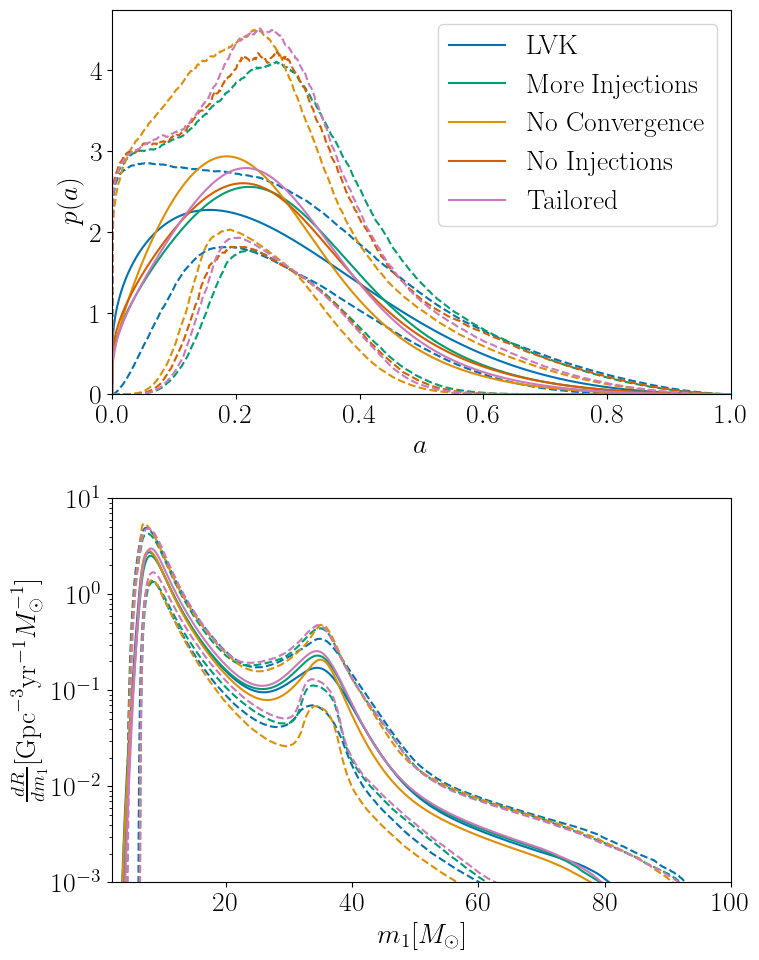

In [3]:
colours = {key: color for key, color in zip(
    ["LVK", "No Convergence", "More Injections", "No Injections", "Tailored"],
    ["C0", "C1", "C2", "C3", "C4"],
)}

fig, axes = plt.subplots(nrows=2, figsize=(8, 10))

plt.sca(axes[0])
data, xvals = load_file("spin_spectra.hdf5")
for key, values in data.items():
    colour = colours[key]
    plt.plot(xvals, values["mean"], color=colour, label=key)
    plt.plot(xvals, values["lower"], color=colour, linestyle="--")
    plt.plot(xvals, values["upper"], color=colour, linestyle="--")
plt.xlim(0, 1)
plt.ylim(0)
plt.xlabel("$a$")
plt.ylabel("$p(a)$")
plt.legend(loc="upper right")

plt.sca(axes[1])
data, xvals = load_file("mass_spectra.hdf5")
for key, values in data.items():
    colour = colours[key]
    plt.plot(xvals, values["mean"], color=colour, label=key)
    plt.plot(xvals, values["lower"], color=colour, linestyle="--")
    plt.plot(xvals, values["upper"], color=colour, linestyle="--")
plt.yscale("log")
plt.xlim(2, 100)
plt.ylim(1e-3, 1e1)
plt.xlabel("$m_{1} [M_{\\odot}]$")
plt.ylabel("$\\frac{dR}{d m_{1}} [{\\rm Gpc}^{-3}{\\rm yr}^{-1} M^{-1}_{\\odot}]$")

plt.tight_layout()
plt.savefig("figure-5.pdf")
plt.show()
plt.close()

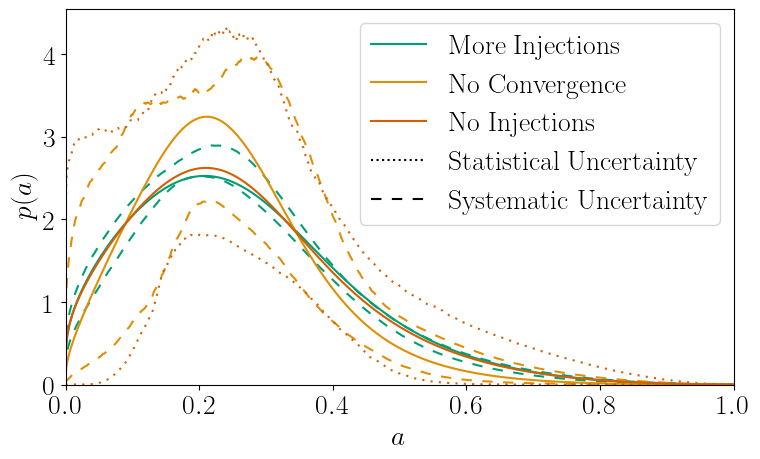

In [4]:
data, xvals = load_file("statsitical_vs_systematic.hdf5")

plt.figure(figsize=(8, 5))
for label, temp in data.items():
    colour = colours[label]
    if label == "No Injections":
        linestyle = (0, (1, 3))
    else:
        linestyle = (0, (5, 5))
    plt.plot(xvals, temp["mean"], label=label, color=colour)
    plt.plot(xvals, temp["lower"], color=colour, linestyle=linestyle)
    plt.plot(xvals, temp["upper"], color=colour, linestyle=linestyle)
plt.axvline(-1, label="Statistical Uncertainty", linestyle=":", color="k")
plt.axvline(-1, label="Systematic Uncertainty", linestyle=(0, (5, 5)), color="k")

plt.xlim(0, 1)
plt.ylim(0)

plt.xlabel("$a$")
plt.ylabel("$p(a)$")
plt.legend(loc="upper right")

plt.tight_layout()
# plt.savefig("figure-6.pdf")
plt.show()
plt.close()